In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
import numpy as np
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=r"C:\Users\Lenovo\Desktop\Thesis\main folder\dataset\New folder\train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=r"C:\Users\Lenovo\Desktop\Thesis\main folder\dataset\New folder\test",target_size=(224,224))

Found 996 images belonging to 2 classes.
Found 684 images belonging to 2 classes.


In [3]:
model= Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.save('model_vgg16.h5')
model = load_model('model_vgg16.h5')
for layer in model.layers:
    layer.trainable=False
model.add(Flatten())

model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=2,activation="softmax"))
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()
history=model.fit_generator(generator=traindata, validation_data=testdata,epochs=5)

model.save('weights1')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

clean solar panel


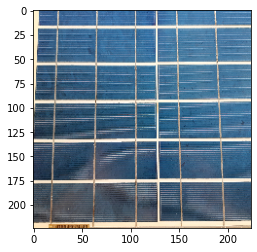

In [4]:
from keras.preprocessing import image
img = image.load_img(r"C:\Users\Lenovo\Desktop\Thesis\coding\dataset_train_test\20210919_151004.jpg", target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img,axis=0)
from keras.models import load_model
saved_model = load_model("weights1")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("clean solar panel")
else:
    print("dirty solar panel")

No handles with labels found to put in legend.


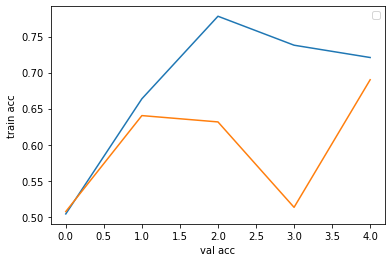

<Figure size 432x288 with 0 Axes>

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('train acc')
plt.xlabel('val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

No handles with labels found to put in legend.


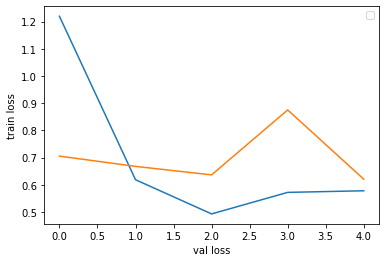

<Figure size 432x288 with 0 Axes>

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('train loss')
plt.xlabel('val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_steps_per_epoch = np.math.ceil(testdata.samples / testdata.batch_size)

predictions = model.predict_generator(testdata , steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = testdata.classes
class_labels = list(testdata.class_indices.keys()) 
import sklearn
# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(testdata.classes, predicted_classes))

report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

Instructions for updating:
Please use Model.predict, which supports generators.
['clean', 'dirty']
[[136 198]
 [152 198]]
              precision    recall  f1-score   support

       clean       0.47      0.41      0.44       334
       dirty       0.50      0.57      0.53       350

    accuracy                           0.49       684
   macro avg       0.49      0.49      0.48       684
weighted avg       0.49      0.49      0.49       684

